# Final Project Submission

Please fill out:
* Student name: **Simranjit Nepaul / Christine Egan / Amarnath Kuppannan**
* Student pace: **Part Time **
* Scheduled project review date/time:  **TBD**
* Instructor name: **Amber Yandow**
* Blog post URL: 
* Video of 5-min Non-Technical Presentation:

## TABLE OF CONTENTS 

*Click to jump to matching Markdown Header.*<br><br>

<font size=3rem>
    
- **[Introduction](#INTRODUCTION)<br>**
- **[OBTAIN](#OBTAIN)**<br>
- **[SCRUB](#SCRUB)**<br>
- **[EXPLORE](#EXPLORE)**<br>
- **[MODEL](#MODEL)**<br>
- **[iNTERPRET](#iNTERPRET)**<br>
- **[Conclusions/Recommendations](#CONCLUSIONS-&-RECOMMENDATIONS)<br>**
</font>
___

# INTRODUCTION

> Explain the point of our project and what question we are trying to answer with your modeling.

# OBTAIN

## Import Required Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
import scipy.stats as stats
%matplotlib inline
import warnings
import seaborn as sns
import scipy.stats as stats

# pd.set_option(display.max_columns,0) # To display set the max coloumn numbers displayed

In [ ]:
x = pd.read_csv('https://raw.githubusercontent.com/snepaul179/Real_EstateModel-onl01-dtsc-pt-052620/master/kc_house_data.csv')
data = x.copy()

# SCRUB

# EXPLORE

> Explore Checklist
- Linearity and No Co-linearity
- Data ~Normality: Histogram
- 
- Homeoscedasticity
- Outlier: Boxplot, 
- Scalling and normalizing

# MODEL

> Modeling Checklist
- High R-squaured
- Low P-values
- 

In [2]:
x = pd.read_csv('https://raw.githubusercontent.com/snepaul179/Real_EstateModel-onl01-dtsc-pt-052620/master/kc_house_data.csv')
data = x.copy()

In [5]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c26095d30>,
      dtype=object)

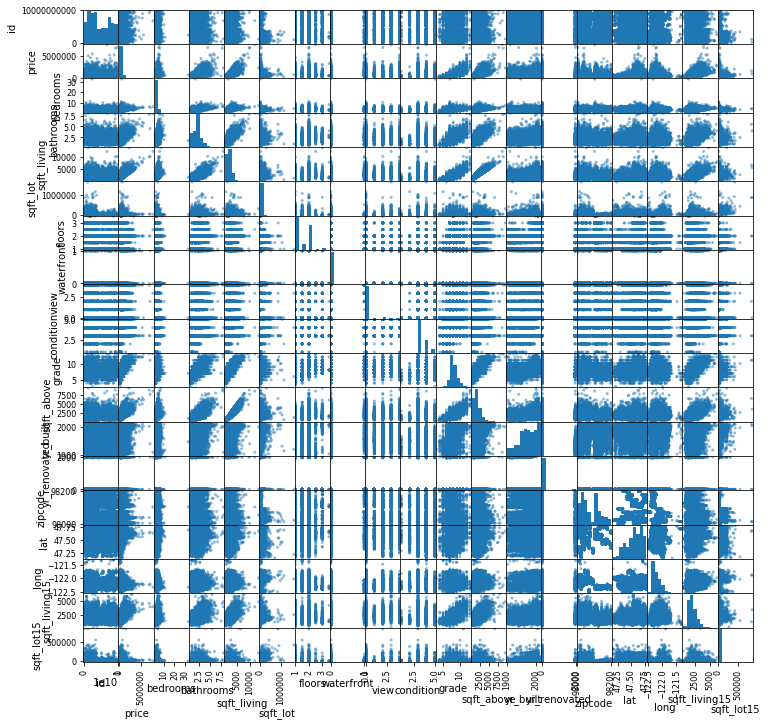

In [10]:
pd.plotting.scatter_matrix(data, figsize=(12,12))
plt.show

Catagorical columns: Floors, Waterfront, view, grade, condition, bedrooms(max?), zipcode(?), date, reno, basement, 

Ignore: lat, log, year_reno, year_built, year_sold, sqft_living15, sqft_lot15,

Continuous Columns: sqft_living, sqft_lot, sqft_abv, sqft_base, age_at_sale, bathrooms(?), age_at_sale

new cols: month_sold, bed_bath_ratio, average price instead or zipcode, year_reno

Traget column: 'price'

In [18]:
def corr_map(df):
    ''' Generates correlation mask to hide the unwanted cells from a correlation matrix. 
    required input is the df (DataFrame)'''
    
    # Set a new fig and its size
    fig, ax= plt.subplots(figsize = (14,14))
    
    # Create a corrrelation matrix for each df columns and round it to 3 sig-figs.
    corr = np.abs(df.corr().round(3))
    
    # Create a mask to hide the duplicate half of the matrix for easy comparison
    mask = np.zeros_like(corr, dtype=np.bool)
    idx = np.triu_indices_from(mask)
    mask[idx] = True
    
    # create a heat map with the help of the correlation values
    sns.heatmap(corr,annot=True,square=True,mask=mask,cmap='Blues',
            center=0,ax=ax,linewidths=.5, cbar_kws={"shrink": .5}, cbar=True)
    
#     plt.set_ylim(len(corr),-0.5,0.5)

AttributeError: module 'matplotlib.pyplot' has no attribute 'set_ylim'

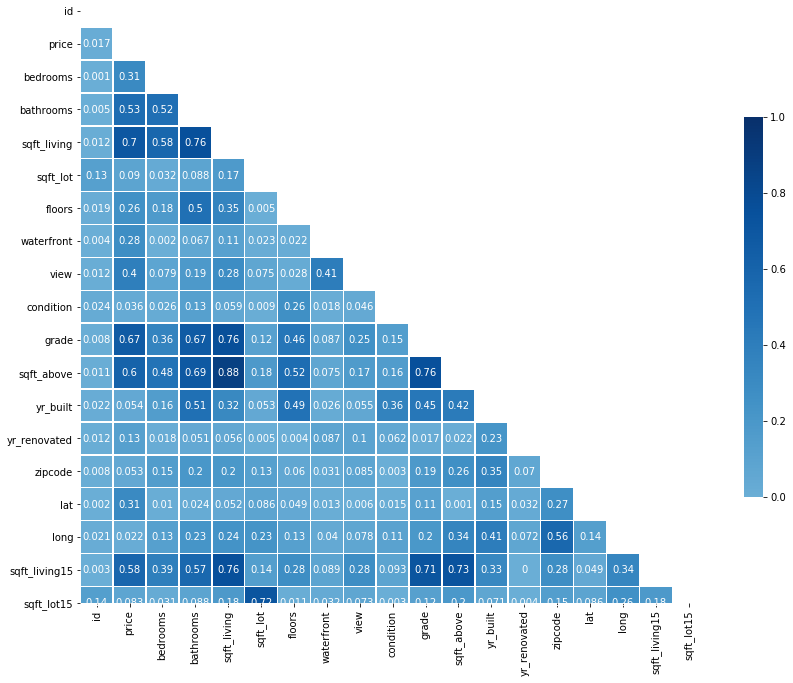

In [17]:
corr_map(data)

In [ ]:
Corelation: sqft and 
Option 1: keep grade and discard 
    other corr columns(sqft_living15, sqft_above, bathrooms, sqft_living). 
Option 2: Discard Grade

In [23]:
def multi_linear_reg (df, drop_cols, target):
    ''' Generate a multilinear model from a DataFrame and without the drop_cols. 
    
    @params:
    df is a pd.DataFrame
    drop_cols is a list of columns to not include in the model fit
    target is the str() of our predicted columns name.
    
    @Output:
    generated linear model
    Columns used to generate the model
    '''
    # generate the columns used to the 
    cols = df.drop(drop_cols,axis=1).columns
    str_cols = ' + '.join(cols)
    str_cols
    
    # join our taget with our predictors str
    f = str(target)+'~'+str_cols
    
    #generate our linear model
    model = smf.ols(f,df).fit()
    model.summary()
    
    # Checking normality of our residule errors
    resids = model.resid
    sm.graphics.qqplot(resids,stats.norm,line='45',fit=True)
    
    return cols, model

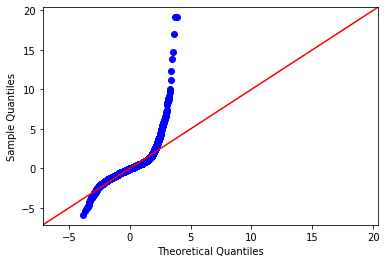

In [29]:
target = 'price'
drop_cols = ['lat', 'long', 'yr_renovated', 'sqft_living15',
             'sqft_lot15','sqft_basement', 'view', 'id', 'date', target]

f_cols, model = multi_linear_reg (data, drop_cols, target)

In [30]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.649
Model:                            OLS   Adj. R-squared:                  0.649
Method:                 Least Squares   F-statistic:                     3236.
Date:                Mon, 31 Aug 2020   Prob (F-statistic):               0.00
Time:                        19:26:52   Log-Likelihood:            -2.6375e+05
No. Observations:               19221   AIC:                         5.275e+05
Df Residuals:                   19209   BIC:                         5.276e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    3.919e+06   3.32e+06      1.180      0.238   -2.59e+06    1.04e+07
bedrooms    -4.347e+04   2189.588    -19.852      0.000   -4.78e+04   -3.92e+04
bathrooms    4.856e+04   3760.437     12.913      0.000    4.12e+04    5.59e+04
sqft_living   191.4784      4.895     39.118      0.000     181.884     201.073
sqft_lot       -0.2567      0.040     -6.374      0.000      -0.336      -0.178
floors       2.602e+04   4116.981      6.319      0.000    1.79e+04    3.41e+04
waterfront   7.491e+05   1.86e+04     40.373      0.000    7.13e+05    7.85e+05
condition    1.893e+04   2688.347      7.041      0.000    1.37e+04    2.42e+04
grade        1.294e+05   2323.798     55.677      0.000    1.25e+05    1.34e+05
sqft_above    -12.9093      4.826     -2.675      0.007     -22.368      -3.451
yr_built    -3803.4307     76.088    -49.987      0.000   -3952.570   -3654.292
zipcode        27.4382     33.329      0.823      0.410     -37.890      92.767
==============================================================================
Omnibus:                    14354.843   Durbin-Watson:                   1.971
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           971642.448
Skew:                           2.998   Prob(JB):                         0.00
Kurtosis:                      37.311   Cond. No.                     2.08e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.08e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Outliers in the upper range.
drop grade. since its correlated with multiple columns


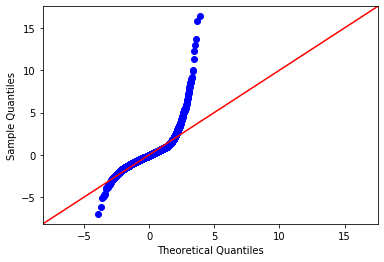

In [31]:
drop_cols = ['lat', 'long', 'yr_renovated', 'sqft_living15',
             'sqft_lot15','sqft_basement', 'view', 'id', 'date', target, 'grade']
f_cols, model = multi_linear_reg (data, drop_cols, target)

In [32]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.593
Model:                            OLS   Adj. R-squared:                  0.593
Method:                 Least Squares   F-statistic:                     2798.
Date:                Mon, 31 Aug 2020   Prob (F-statistic):               0.00
Time:                        19:27:52   Log-Likelihood:            -2.6519e+05
No. Observations:               19221   AIC:                         5.304e+05
Df Residuals:                   19210   BIC:                         5.305e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -2.929e+06   3.58e+06     -0.819      0.413   -9.94e+06    4.08e+06
bedrooms     -6.27e+04   2330.060    -26.909      0.000   -6.73e+04   -5.81e+04
bathrooms    6.684e+04   4036.945     16.557      0.000    5.89e+04    7.48e+04
sqft_living   275.5637      5.018     54.919      0.000     265.729     285.399
sqft_lot       -0.3417      0.043     -7.880      0.000      -0.427      -0.257
floors       4.552e+04   4420.555     10.298      0.000    3.69e+04    5.42e+04
waterfront   7.672e+05      2e+04     38.373      0.000    7.28e+05    8.06e+05
condition    1.935e+04   2897.075      6.680      0.000    1.37e+04     2.5e+04
sqft_above     26.7089      5.143      5.193      0.000      16.627      36.791
yr_built    -3075.4525     80.776    -38.074      0.000   -3233.781   -2917.124
zipcode        90.1988     35.897      2.513      0.012      19.838     160.560
==============================================================================
Omnibus:                    11643.381   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           397096.301
Skew:                           2.360   Prob(JB):                         0.00
Kurtosis:                      24.761   Cond. No.                     2.08e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.08e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

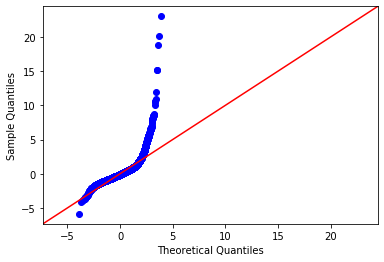

In [37]:
drop_cols = ['lat', 'long', 'yr_renovated', 'sqft_living15',
             'sqft_lot15','sqft_basement', 'view', 'id', 'date', target, 
              'sqft_above', 'bathrooms', 'sqft_living', 'zipcode', 'yr_built']
f_cols, model = multi_linear_reg (data, drop_cols, target)

In [38]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.516
Model:                            OLS   Adj. R-squared:                  0.515
Method:                 Least Squares   F-statistic:                     3407.
Date:                Mon, 31 Aug 2020   Prob (F-statistic):               0.00
Time:                        19:32:06   Log-Likelihood:            -2.6686e+05
No. Observations:               19221   AIC:                         5.337e+05
Df Residuals:                   19214   BIC:                         5.338e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -1.35e+06   1.72e+04    -78.313      0.000   -1.38e+06   -1.32e+06
bedrooms    3.141e+04   2168.878     14.481      0.000    2.72e+04    3.57e+04
sqft_lot       0.0624      0.046      1.349      0.177      -0.028       0.153
floors     -1.823e+04   4007.897     -4.548      0.000   -2.61e+04   -1.04e+04
waterfront  9.352e+05   2.16e+04     43.214      0.000    8.93e+05    9.78e+05
condition   6.816e+04   2994.849     22.759      0.000    6.23e+04     7.4e+04
grade       2.053e+05   1911.954    107.364      0.000    2.02e+05    2.09e+05
==============================================================================
Omnibus:                    16986.579   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1812082.511
Skew:                           3.788   Prob(JB):                         0.00
Kurtosis:                      49.960   Cond. No.                     5.06e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.06e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

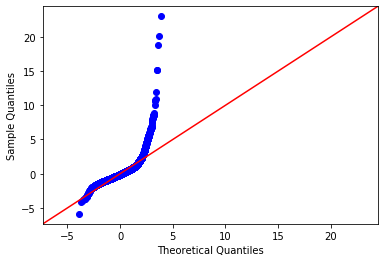

In [39]:
drop_cols = ['lat', 'long', 'yr_renovated', 'sqft_living15',
             'sqft_lot15','sqft_basement', 'view', 'id', 'date', target, 
              'sqft_above', 'bathrooms', 'sqft_living', 'zipcode', 'yr_built',
              'floors', 'sqft_lot']
f_cols, model = multi_linear_reg (data, drop_cols, target)

In [40]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.515
Model:                            OLS   Adj. R-squared:                  0.515
Method:                 Least Squares   F-statistic:                     5100.
Date:                Mon, 31 Aug 2020   Prob (F-statistic):               0.00
Time:                        19:35:35   Log-Likelihood:            -2.6687e+05
No. Observations:               19221   AIC:                         5.338e+05
Df Residuals:                   19216   BIC:                         5.338e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.361e+06   1.71e+04    -79.549      0.000   -1.39e+06   -1.33e+06
bedrooms    3.097e+04   2168.207     14.284      0.000    2.67e+04    3.52e+04
waterfront  9.368e+05   2.17e+04     43.270      0.000    8.94e+05    9.79e+05
condition   7.126e+04   2918.483     24.418      0.000    6.55e+04     7.7e+04
grade        2.02e+05   1736.764    116.336      0.000    1.99e+05    2.05e+05
==============================================================================
Omnibus:                    17025.998   Durbin-Watson:                   1.966
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1822193.415
Skew:                           3.802   Prob(JB):                         0.00
Kurtosis:                      50.090   Cond. No.                         107.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
next step: outliers, trasfrorming data (feature), age at sale fe